# **Breast Cancer Dataset Prediction**

Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

Tumour cells are generally categorized in 2 classes -
   * 1) Malignant - M
   * 2) Benign - B

## About the data:
Attribute Information:

   * 1) ID number 
   * 2) Diagnosis (M = malignant, B = benign) 
   * 3–32) - Ten real-valued features are computed for each cell nucleus:
        * radius (mean of distances from center to points on the perimeter)
        * texture (standard deviation of gray-scale values)
        * perimeter
        * area
        * smoothness (local variation in radius lengths)
        * compactness (perimeter² / area — 1.0)
        * concavity (severity of concave portions of the contour)
        * concave points (number of concave portions of the contour)
        * symmetry
        * fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### Importing libraries

In [ ]:
#mounting google drive to connect to data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
#importing necessary libraries for now, any extra libraries, if needed, will be loaded later on
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [75]:
#reading the csv datafile
df = pd.read_csv('/content/drive/MyDrive/Datasets & notebooks/Breast cancer dataset/breast cancer data.csv')

### Basic data info gathering

In [76]:
df.shape

(569, 33)

The dataset has 569 rows and 33 columns. We will

In [77]:
#checking top 5 rows of dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
col = df.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [79]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Dropping first & last column as first column contains ID and last column contains all NaN which we don't need at all. 
Diagnosis is our target class label in the above dataset.

In [80]:
#splitting dataset into target class label and features with y being dataframe for target label and x being dataframe for our features
y = df.diagnosis                          # M or B 
to_drop = ['Unnamed: 32','id','diagnosis']
x = df.drop(to_drop, axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign: 357
Number of Malignant: 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


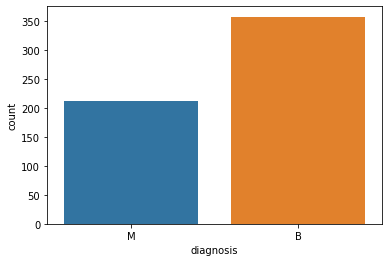

In [17]:
x = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign:',B)
print('Number of Malignant:',M)

In [ ]:
#checking statistical values of the features dataframe
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Upon checking the above data, we get to know that for feature - area_mean, the range is quite high (2501 - 143) whereas for features like smoothness_mean, compactness_mean and etc, the range is very small relatively. 

So, later on before feeding the dataset to the models, we will need to standardize the dataset to account for biasness towards the features with large range.

## Visualization
Here we will try to understand the different features of the dataset. As said above, the scales of features are on different ranges so, we will need to do standardization/normalization.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

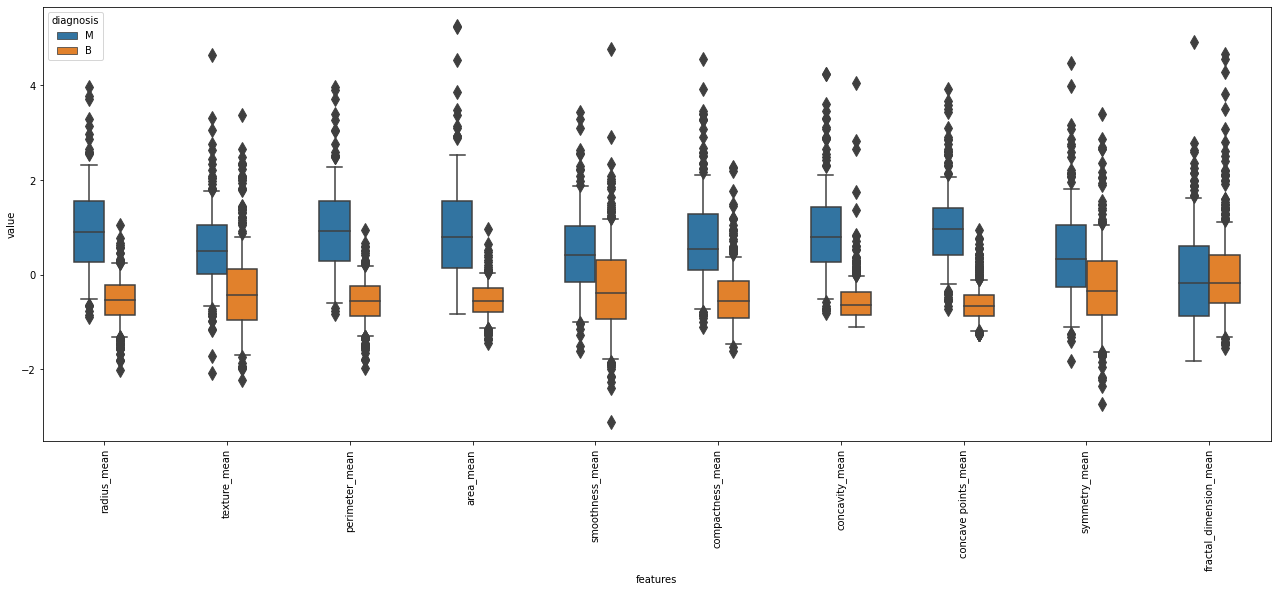

In [46]:
#plotting first 10 features of the dataset x which contains all the feature variables

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())      #standardization across mean
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(22,8))
sns.boxplot(y="value", x="features", hue="diagnosis", data = data, width = 0.5, whis = 0.7, fliersize=10)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

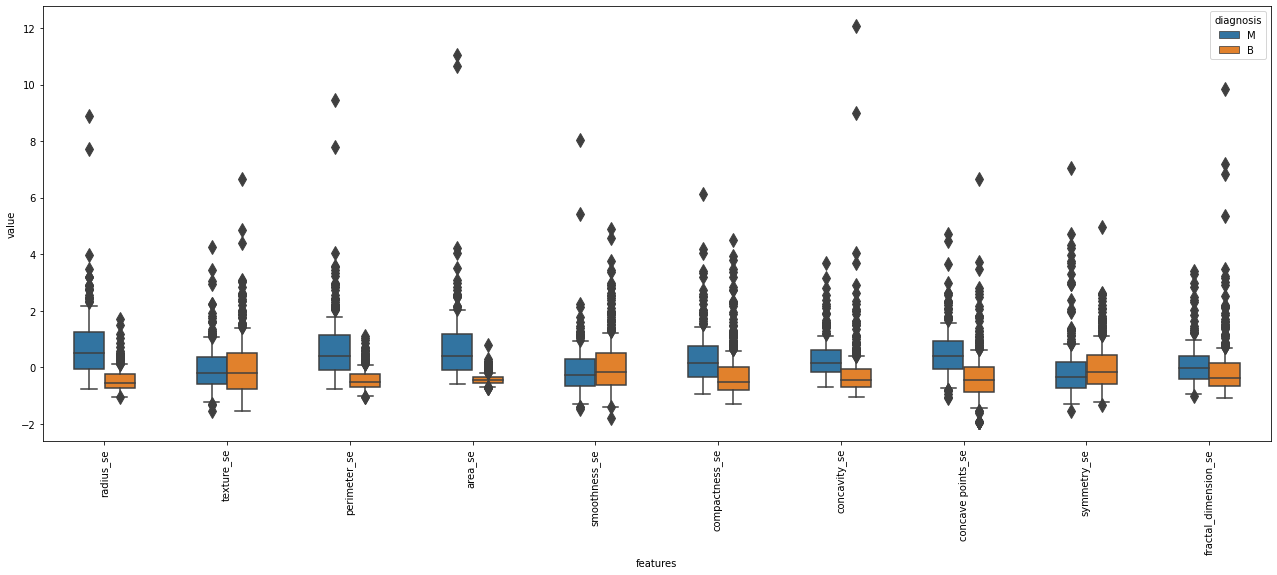

In [47]:
#plotting second 10 features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(22,8))
sns.boxplot(y="value", x="features", hue="diagnosis", data = data, width = 0.5, whis = 0.7, fliersize=10)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

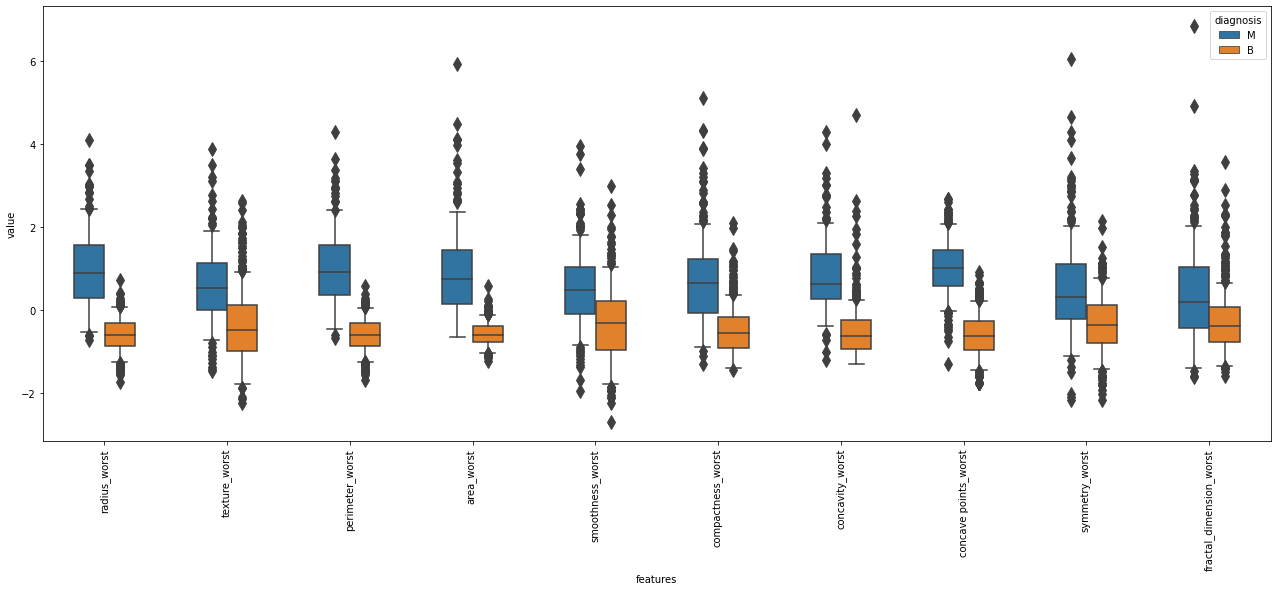

In [48]:
#plotting remaining features
data = pd.concat([y,data_n_2.iloc[:,20:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(22,8))
sns.boxplot(y="value", x="features", hue="diagnosis", data = data, width = 0.5, whis = 0.7, fliersize=10)
plt.xticks(rotation=90)

## Correlation between two features



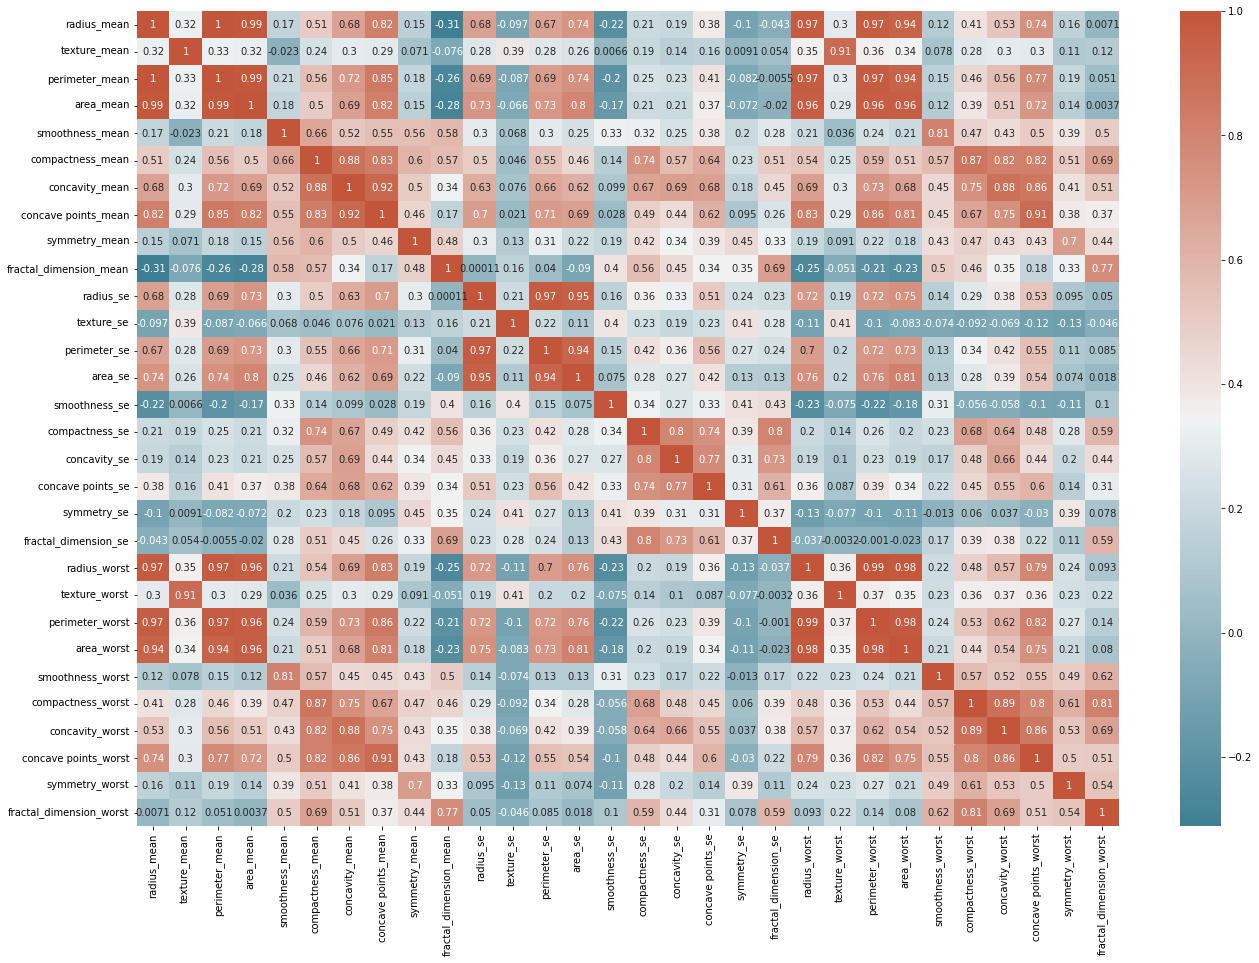

In [61]:
plt.figure(figsize=(22,15))
corrmat = x.corr()
sns.heatmap(corrmat, xticklabels=corrmat.columns, yticklabels=corrmat.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Figure size 1584x576 with 0 Axes>

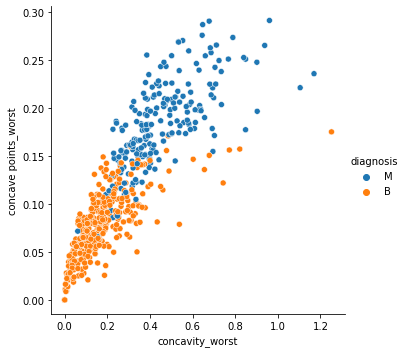

In [57]:
plt.figure(figsize=(22,8))
sns.relplot(x='concavity_worst', y='concave points_worst', hue=data_dia, data=x, kind='line')

From the dataset above, concavity_worst and concave points_worst seems to be the same or similar. On plotting a scatter of these two, we get to know that pearson coeff value is 0.86 and indeed there is a strong positive correlation between them

We will try to check correlation for few more featuers together.

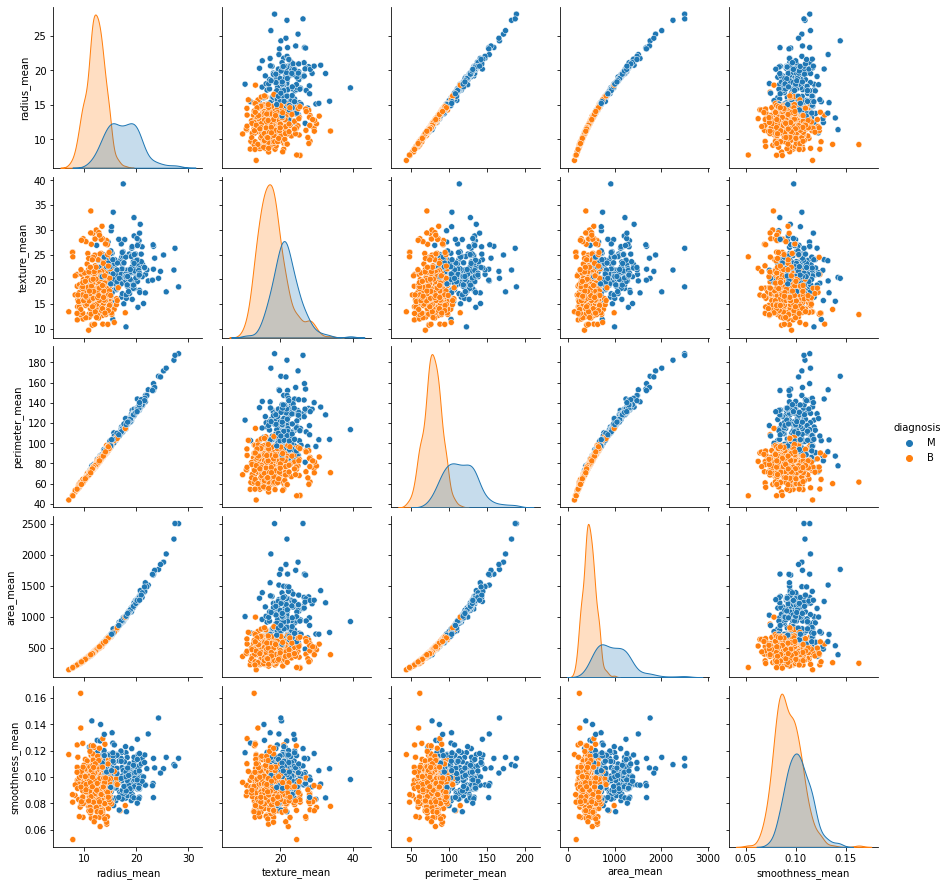

In [73]:
sns.pairplot(df.iloc[:,1:7], hue='diagnosis', data=df)

Using the pairplot above, we can draw the following inferences for first 5 feature columns -


1.   radius_mean, perimeter_mean and area_mean is larger for Malignant category compared to Benign 
2.   texture_mean & smoothness_mean follow a very close normal distribution



## Correlation between three or more features


We will use pair grid plot for plotting three or more categories.

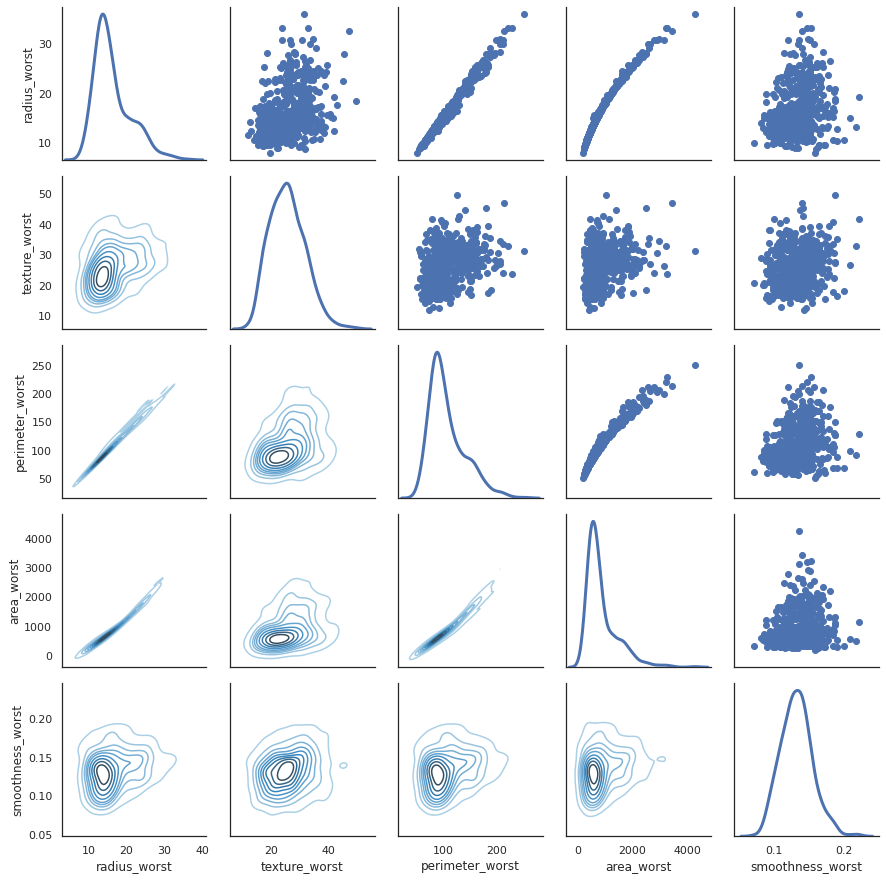

In [87]:
sns.set(style="white")
a = sns.PairGrid(df.loc[:,['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst']], diag_sharey=False)
a.map_lower(sns.kdeplot, cmap="Blues_d")
a.map_upper(plt.scatter)
a.map_diag(sns.kdeplot, lw=3)

From the help of above graph, we get to see that radius_worst, perimeter_worst and area_worst are highly correlated with pearson coeff values as -


*   radius_worst and perimeter_worst - 0.99
*   radius_worst and area_worst - 0.98
*   area_worst and perimeter_worst - 0.98






## Fitting Model

In [89]:
#performing one hot encoding on target label
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['diagnosis'] = LE.fit_transform(df['diagnosis'])

In [91]:
#importing train test split and standard scaler from sklearn

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state=42)
SS = StandardScaler()

#using standard scaler

x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [117]:
#fitting via decision tree classifier

from sklearn.tree import DecisionTreeClassifier

#using gini
dt_g = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_g.fit(x_train, y_train)

#using entropy
dt_e = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_e.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [118]:
#checking accuracy of decision tree classifier using gini and entropy respectively

print("Accuracy of Decision Tree classifier on testing dataset based on gini criterion is : ", dt_g.score(x_test, y_test))
print("Accuracy of Decision Tree classifier on testing dataset based on entropy is : ", dt_e.score(x_test, y_test))

Accuracy of Decision Tree classifier on testing dataset based on gini criterion is :  0.9298245614035088
Accuracy of Decision Tree classifier on testing dataset based on entropy is :  0.9590643274853801


As a known fact, we get to see that entropy criteria is able to score relatively better compared to gini criterion. 

Below we will try to fix the max depth of the branching and try to see the impact on accuracy score.

In [119]:
#fixing max depth
dt_g1 = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=42)
dt_g1.fit(x_train, y_train)

dt_e1 = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=42)
dt_e1.fit(x_train, y_train)

print("Accuracy of Decision Tree classifier on testing dataset based on gini criterion with max depth as 3 is : ", dt_g1.score(x_test, y_test))
print("Accuracy of Decision Tree classifier on testing dataset based on entropy with max depth as 3 is : ", dt_e1.score(x_test, y_test))

Accuracy of Decision Tree classifier on testing dataset based on gini criterion with max depth as 3 is :  0.9649122807017544
Accuracy of Decision Tree classifier on testing dataset based on entropy with max depth as 3 is :  0.9649122807017544


We get to see that after fixing max depth as 3, both the splitting criteria for decision tree - gini and entropy are performing the same on the metric of accuracy score. 

Now, let's try to plot the confusion matrix.

Classification report for Decision Tree classifier using entropy : 
 
               precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



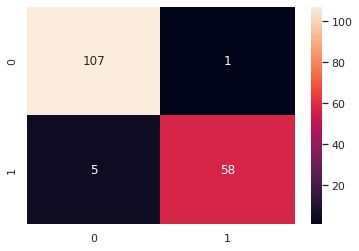

In [129]:
#printing confusion matrix for the above test set
from sklearn.metrics import f1_score, confusion_matrix, classification_report

cm_e1 = confusion_matrix(y_test, dt_e1.predict(x_test))
sns.heatmap(cm_e1,annot=True,fmt="d")

print('Classification report for Decision Tree classifier using entropy : \n \n', classification_report(y_test, dt_e1.predict(x_test)))

Classification report for Decision Tree classifier using gini : 
 
               precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



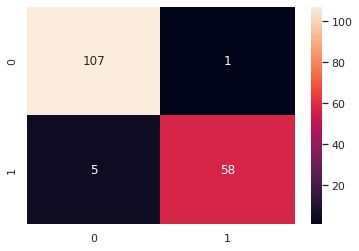

In [130]:
cm_g1 = confusion_matrix(y_test, dt_g1.predict(x_test))
sns.heatmap(cm_g1,annot=True,fmt="d")

print('Classification report for Decision Tree classifier using gini : \n \n', classification_report(y_test, dt_g1.predict(x_test)))

We get to see that the classification report generated above for both the criterion is same on all scoring parameters.

In [133]:
#fitting via logistic regression classifier

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 30)
LR.fit(x_train,y_train)

print("Accuracy of Logistic Regression classifier on testing dataset is : ", LR.score(x_test, y_test))

Accuracy of Logistic Regression classifier on testing dataset is :  0.9766081871345029


Classification report for Logistic Regression classifier : 
 
               precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



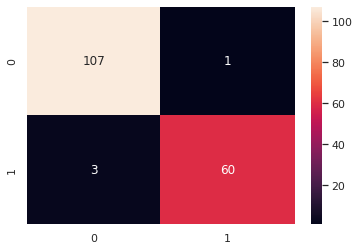

In [134]:
cm_LR = confusion_matrix(y_test, LR.predict(x_test))
sns.heatmap(cm_LR,annot=True,fmt="d")

print('Classification report for Logistic Regression classifier : \n \n', classification_report(y_test, dt_g1.predict(x_test)))

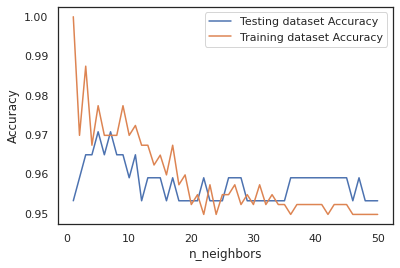

In [135]:
#fitting via K-NN classifier

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 51)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    #computing accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

We get to see that the accuracy for testing dataset is highest around the 5 to 8 region. So, we will select 5 as our nearest neighbor and calculate accuracy score and resulting classification matrix.

In [150]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train, y_train)

print("Accuracy of K-NN classifier on testing dataset is : ", knn_5.score(x_test, y_test))

Accuracy of K-NN classifier on testing dataset is :  0.9707602339181286


Classification report for K-NN classifier : 
 
               precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



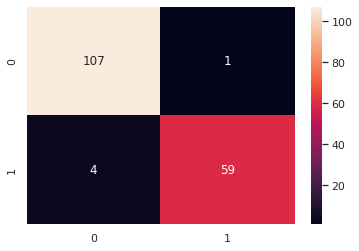

In [152]:
#plotting associated confusion matrix and classification report
cm_knn_5 = confusion_matrix(y_test, knn_5.predict(x_test))
sns.heatmap(cm_knn_5,annot=True,fmt="d")

print('Classification report for K-NN classifier : \n \n', classification_report(y_test, knn_5.predict(x_test)))

## **Conclusion**

We see that for the three models trained i.e. Decision tree classifier, Logistric regression classifier and K-NN classifier the accuracy score are as follows - 



1.   Decision tree classifier - 96.49%
2.   Logistic regression classifier - 97.66%
3.   K-NN classifier - 97.08%


Whereas, checking the f-1 score for both Benign & Malignant categories for the three models we see that F-1 score for K-NN is having better score (0.98, 0.96) compared to decision tree classifier and logistic regression classifier which are having same values (0.97, 0.95).

So, we can say all the three modesl with tuning the parameters are performing relatively similar.

